# Comparing IMDB ratings with Gross Revenue

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from pandasql import sqldf
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('TN_budget_and_IMDB.csv').drop_duplicates('tconst')
ratings_df = pd.read_csv('zippedData\imdb.title.ratings.csv.gz')

In [17]:
q = """SELECT *
    FROM df
    JOIN ratings_df
    USING(tconst);"""

results = sqldf(q)
results['worldwide_gross'] = results['worldwide_gross'].apply(lambda x:x/1000000)

[Text(0, 0.5, 'Worldwide Gross [in Millions]'),
 Text(0.5, 0, 'Average Rating on IMDB')]

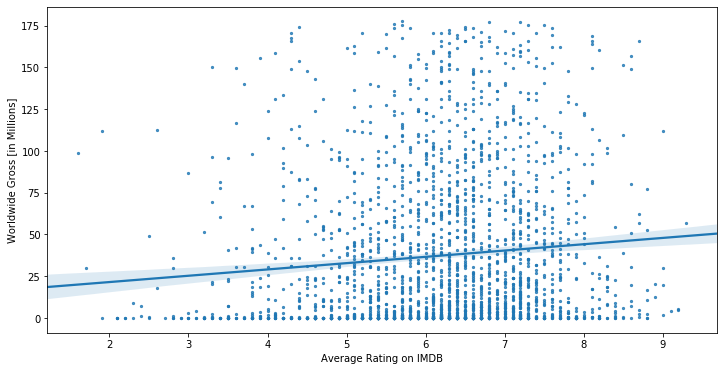

In [25]:
med = results['worldwide_gross'].median()
IQR = results['worldwide_gross'].quantile(0.75)-results['worldwide_gross'].quantile(0.25)
max_gross = med + IQR*1.5
qstr = 'worldwide_gross < '+str(max_gross)
plt.figure(figsize=(12,6))
ax = sns.regplot(x='averagerating',y='worldwide_gross',data=results.query(qstr),scatter_kws={"s": 5})
ax.set(xlabel = 'Average Rating on IMDB',ylabel = 'Worldwide Gross [in Millions]')

In [12]:
results.corr()

,production_budget,domestic_gross,worldwide_gross,averagerating,numvotes
production_budget,1.000000,0.725548,0.782032,0.131521,0.507117
domestic_gross,0.725548,1.000000,0.947640,0.179980,0.575995
worldwide_gross,0.782032,0.947640,1.000000,0.167502,0.570280
averagerating,0.131521,0.179980,0.167502,1.000000,0.318482
numvotes,0.507117,0.575995,0.570280,0.318482,1.000000
